<a href="https://colab.research.google.com/github/deepborse123/Python_Analysis/blob/main/Steel_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Steel Rate Prediction**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [ ]:
from google.colab import files
upl=files.upload()

Saving Steel_price_data.csv to Steel_price_data (1).csv


In [ ]:
df=pd.read_csv("Steel_price_data (1).csv")

In [ ]:
df.head()

,Date,SPX,Steel Rate,UsD,Raw Material Costs,EUR/USD
0,02-01-17,1395.420044,89.349998,70.470001,16.618999,1.479991
1,04-01-17,1370.180054,86.860001,81.059998,16.600000,1.567791
2,05-01-17,1409.339966,83.989998,90.379997,15.994000,1.543400
3,07-01-17,1284.910034,92.660004,114.589996,17.900000,1.587806
4,10-01-17,1161.060059,85.970001,79.589996,12.330000,1.380796


In [ ]:
df.tail()

,Date,SPX,Steel Rate,UsD,Raw Material Costs,EUR/USD
2285,9/30/2018,1057.079956,98.849998,36.189999,16.379999,1.451589
2286,9/30/2018,1141.199951,127.910004,34.840000,21.309999,1.362212
2287,9/30/2020,1681.550049,128.179993,36.849998,20.900000,1.352521
2288,9/30/2020,1972.290039,116.209999,34.410000,16.350000,1.262834
2289,9/30/2021,1920.030029,106.860001,14.680000,13.870000,1.117206


In [ ]:
df["Date"].replace("-","/",inplace=True)

In [ ]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2290 entries, 0 to 2289
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
2290 non-null   object
dtypes: object(1)
memory usage: 18.0+ KB


In [ ]:
df.isnull().sum()

Date                  0
SPX                   0
Steel Rate            0
UsD                   0
Raw Material Costs    0
EUR/USD               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2290 non-null   object 
 1   SPX                 2290 non-null   float64
 2   Steel Rate          2290 non-null   float64
 3   UsD                 2290 non-null   float64
 4   Raw Material Costs  2290 non-null   float64
 5   EUR/USD             2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.describe()

,SPX,Steel Rate,UsD,Raw Material Costs,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.347218,122.732875,31.842221,20.084997,1.283654
std,519.133515,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.size

13740

In [ ]:
df.shape

(2290, 6)

In [ ]:
correlation = df.corr(numeric_only=True)

In [ ]:
correlation

,SPX,Steel Rate,UsD,Raw Material Costs,EUR/USD
SPX,1.000000,0.049313,-0.591587,-0.274086,-0.672031
Steel Rate,0.049313,1.000000,-0.186360,0.866632,-0.024375
UsD,-0.591587,-0.186360,1.000000,0.167547,0.829315
Raw Material Costs,-0.274086,0.866632,0.167547,1.000000,0.321629
EUR/USD,-0.672031,-0.024375,0.829315,0.321629,1.000000


In [ ]:
df["Steel Rate"].max()

184.589996

In [ ]:
df["Steel Rate"].min()

70.0

**Correlation**

<Axes: >

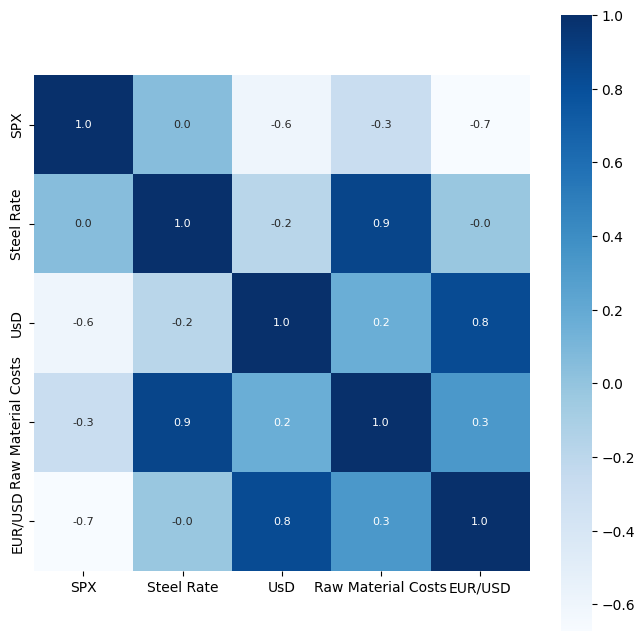

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
df.head(1)

,Date,SPX,Steel Rate,UsD,Raw Material Costs,EUR/USD
0,02-01-17,1395.420044,89.349998,70.470001,16.618999,1.479991


In [ ]:
print(correlation['Steel Rate'])

SPX                   0.049313
Steel Rate            1.000000
UsD                  -0.186360
Raw Material Costs    0.866632
EUR/USD              -0.024375
Name: Steel Rate, dtype: float64


**checking the distribution of the Steel Price**

<ipython-input-29-df199db7725c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Steel Rate'],color='red')


<Axes: xlabel='Steel Rate', ylabel='Density'>

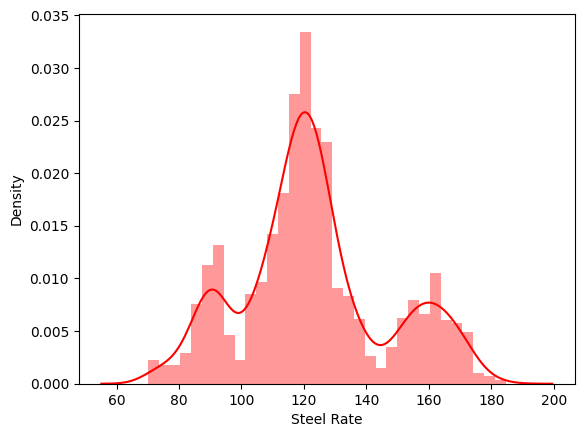

In [ ]:
sns.distplot(df['Steel Rate'],color='red')

In [ ]:
df_x = df.drop(['Date','Steel Rate'],axis=1)
df_y = df['Steel Rate']

In [ ]:
df_x.head(2)

,SPX,UsD,Raw Material Costs,EUR/USD
0,1395.420044,70.470001,16.618999,1.479991
1,1370.180054,81.059998,16.600000,1.567791


In [ ]:
df_y.head(2)

0    89.349998
1    86.860001
Name: Steel Rate, dtype: float64

**Split Dataset in Train and Test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=2)

In [ ]:
x_train.shape

(1832, 4)

In [ ]:
x_test.shape

(458, 4)

In [ ]:
y_train.shape

(1832,)

In [ ]:
y_test.shape

(458,)

**prediction on Test Data**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.linear_model import LinearRegression

**import LinearRegression ML algo Class**

In [ ]:
lin_reg=LinearRegression()

In [ ]:
lin_reg.fit(x_train,y_train)

LinearRegression()

**Test the Model**

In [ ]:
y_pred= lin_reg.predict(x_test)

In [ ]:
y_pred[0:5]

array([120.06234949,  87.58057261, 119.45989863, 121.50293734,
       141.36725671])

In [ ]:
y_test.head()

903     126.820000
129      82.750000
1787    117.180000
1913    126.940002
2048    155.669998
Name: Steel Rate, dtype: float64

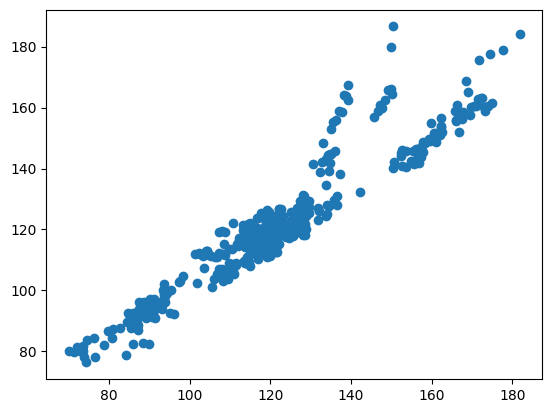

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
data_prediction = regressor.predict(x_test)

**Model Evaluation**

In [ ]:
print(data_prediction)

[126.30020038  83.73139853 118.03919986 125.13539984 152.950001
 126.95359997 120.57649975 127.12770068 117.41980087 127.4756004
 119.75139867 113.62140057 164.84440189 125.51339985 115.73809988
 120.15789876 103.93389898 106.66810091 126.52429931 117.47040089
 114.91400105 113.49000049 122.64910027 115.98839984 124.56990123
 169.86729999 103.74500069 109.14309925 109.18590064 119.17489978
 147.27589884 171.8532029  113.2684004  121.37650039 120.15730045
 115.10110046 118.76940093 119.21899974 114.55349942 124.36229994
 152.78000316  90.19429976 171.87100187 124.85079891 125.32230057
 145.97470028 160.42210227  91.99629945  73.78960049  95.15519882
 107.87899873 125.88340008 161.86770223 110.39090038 174.41669833
 122.33490044 120.33400039 126.32420154 101.88089995  72.23780069
  82.19839969 117.36589838 149.28390099 122.37779918 168.90599888
 120.03840048  82.15969958 122.76789972 108.94189965 162.00019912
 117.60420026 114.57330023 121.31579931 118.75689991  92.93659908
 147.95670049

In [ ]:
error_score = metrics.r2_score(y_test, data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9835947125610891


In [ ]:
y_test = list(y_test)

**Compare the Actual Values and Predicted Values in a Plot**

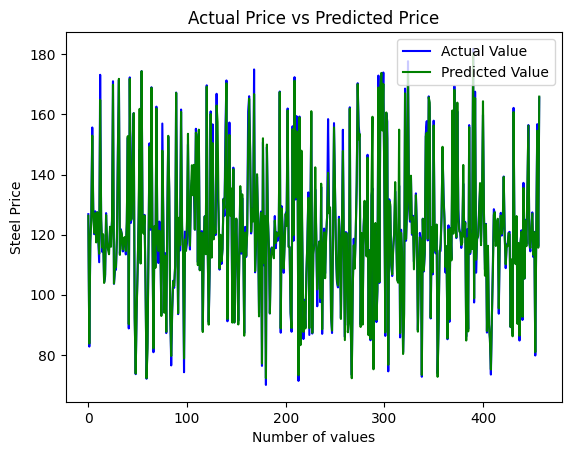

In [ ]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Steel Price')
plt.legend()
plt.show()